In [65]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.sparse.linalg import expm

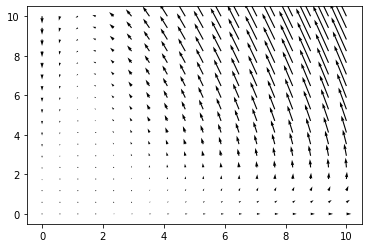

In [28]:
x = np.linspace(0, 10, 18)
y = np.linspace(0, 10, 18)
X2, Y2= np.meshgrid(x, y)
U2 = 2*X2-X2*Y2
V2 = 2*X2*Y2-3*Y2
plt.quiver(X2, Y2, U2, V2)

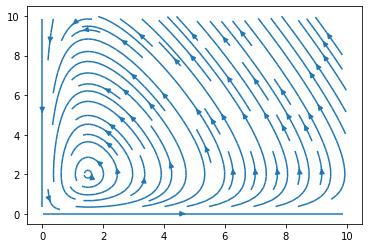

In [29]:
plt.streamplot(X2, Y2, U2, V2)

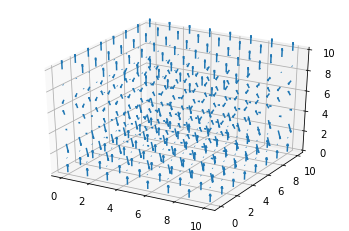

In [30]:
x = np.linspace(0, 10, 8)
y = np.linspace(0, 10, 8)
z = np.linspace(0, 10, 8)
X3, Y3, Z3= np.meshgrid(x, y, z)
U3 = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
V3 = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
W3 = np.sqrt(2/3) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
plt.gca(projection='3d')
plt.quiver(X3, Y3, Z3, U3, V3, W3)

In [31]:
def vitesse(X):
    x = X[0]
    y = X[1]
    u = 2*x-x*y
    v = 2*x*y-3*y
    return (np.array([[u], [v]]))

In [32]:
def grad_vitesse(X):
    x = X[0]
    y = X[1]
    return np.array([[2-y, 2*y], [-x, 2*x-3]])

In [102]:
def fonction(X, t):
    if len(X)==2:
        dir_z = np.array([[0], [1]])
        grad_u = grad_vitesse(X)
        vit = vitesse(X)
    else : 
        dir_z = np.array([[0], [0], [1]])
        grad_u = grad_vitesse3(X)
        vit = vitesse3(X)
    V_plank = 1
    tau = 0.1#t[1]-t[0]
    p_surf = np.dot(expm(tau * grad_u).T, dir_z)
    norme_p = np.linalg.norm(p_surf)
    dir_p = (1/norme_p) * p_surf
    res = vit + V_plank * dir_p
    if len(X)==2:
        return [res[0, 0], res[1, 0]]
    else :
        return [res[0, 0], res[1, 0], res[2, 0]]

In [103]:
t = np.linspace(0, 100, 10000)
X_0 = [3,2]
Xr2, Yr2 = odeint(fonction, X_0, t).T

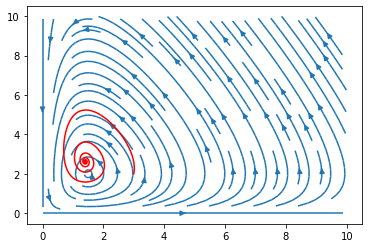

In [104]:
plt.plot(Xr2, Yr2, color='r')
plt.streamplot(X2, Y2, U2, V2)

In [92]:
def vitesse3(X):
    x = X[0]
    y = X[1]
    z = X[2]
    u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
    v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
    w = np.sqrt(2/3) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
    return (np.array([[u], [v], [w]]))

In [93]:
def grad_vitesse3(X):
    x = X[0]
    y = X[1]
    z = X[2]
    V = vitesse3(X)
    u = V[0, 0]
    v = V[1, 0]
    w = V[2, 0]
    return np.array([[u*np.pi/np.tan(np.pi*x), -np.pi*v*np.tan(np.pi*x), -np.pi*w*np.tan(np.pi*x)],
                     [-np.pi*u*np.tan(np.pi*y), v*np.pi/np.tan(np.pi*y), -np.pi*w*np.tan(np.pi*y)],
                     [-np.pi*u*np.tan(np.pi*z), -np.pi*v*np.tan(np.pi*z), -np.pi*w*np.tan(np.pi*z)]])

In [100]:
t = np.linspace(0, 10, 10000)
X_0 = [3,2,1]
Xr3, Yr3, Zr3 = odeint(fonction, X_0, t).T

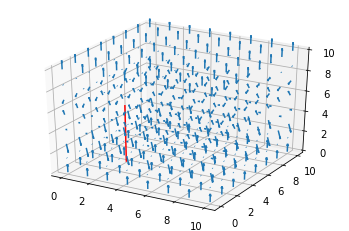

In [101]:
plt.gca(projection='3d')
plt.quiver(X3, Y3, Z3, U3, V3, W3)
plt.plot(Xr3, Yr3, Zr3, color='r')